# ANOVA 

## Introduction

ANOVA (Analysis of Variance) is a method for generalizing statistical tests to multiple groups. As you'll see, ANOVA  analyses the overall variance of a dataset by partitioning the total sum of squared deviations (from the mean) into the sum of squares for each of these groups and sum of squares for error. By comparing the statistical test for multiple groups, it can serve as a useful alternative to the t-tests you've encountered thus far when you wish to test multiple factors simultaneously.

## Objectives

You will be able to:
- Explain the methodology behind ANOVA tests 
- Use ANOVA for testing multiple pairwise comparisons 


## Explanation of ANOVA

To perform ANOVA, you begin with sample observations from multiple groups. Since ANOVA is looking to explain the total variance as combinations of variance from the various groups, you typically design a multiple groups experiment to test various independent factors that we hypothesize may influence the overall result. For example, imagine an email campaign designed to optimize donation contributions. In order to get the most money in donations, one might send out two different emails, both copies being identical except for the subject line. This would form a sensible hypothesis test, but if you wanted to test multiple changes simultaneously, swapping out subject line, time sent, thank you gift offers, or other details in the email campaign, then ANOVA would be a more appropriate methodology. In this scenario, you would change one or more of these various features and record the various donations. Once you have sample observations from various combinations of these features, you can then use ANOVA to analyze and compare the effectiveness of the individual features themselves.  

The general idea is to break the sum of squared deviations into multiple parts: the sum of squared deviations of the mean of each of the test groups to the observations within the group itself, and the sum of squared deviations of the mean of these test groups to the mean of all observations. 

This is easier to understand through the context of an example. For the email case described above, ANOVA would compare the variance of donations within each of the groups to the overall variance of all donations (or lack thereof) as a whole. If the variance of a single group's donations versus that of the overall sample is substantial, there is reason to reject the null hypothesis for that feature. This forms the foundation of the f-test which is at the heart of ANOVA. 

Recall that you would not perform multiple t-tests with such a scenario because of the multiple comparisons problem. Type I errors will be confounded when conducting multiple t-tests. While the alpha threshold for any one test might be 0.05, it would not be surprising to reject the null hypothesis in at least one of these cases, just by pure chance, if you conduct 5 or 10 t-tests.

## ANOVA in Python

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(12)
races = ["asian",
         "black",
         "latino",
         "other",
         "white"]

In [3]:
# Generate random data
voter_race = np.random.choice(a=races,
                              p= [.05, .15, .25, .05, .50],
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

white_ages = stats.poisson.rvs(loc=18,
                              mu=32,
                              size=1000)

voter_age = np.where(voter_race=="white", white_ages, voter_age)

In [4]:
#Group age data by race
voter_frame = pd.DataFrame({"race":voter_race, "age":voter_age})
groups = voter_frame.groupby("race").groups

In [5]:
# Extrace individual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
latino = voter_age[groups["latino"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

In [6]:
# Perform the ANOVA
stats.f_oneway(asian, black, latino, other, white)

F_onewayResult(statistic=7.4271920337466195, pvalue=6.7833894514446805e-06)

In [9]:
# model formula
model = ols ('age ~ race',
             data = voter_frame).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

                sum_sq     df         F    PR(>F)
race        994.148262    4.0  7.427192  0.000007
Residual  33295.810738  995.0       NaN       NaN


In [8]:
race_pairs = []

for race1 in range(len(races)):
    for race2 in range(race1+1, len(races)):
        race_pairs.append((races[race1], races[race2]))
    
    # Conduct t-text on each pair
    for race1, race2 in race_pairs:
        print(race1, race2)
        print(stats.ttest_ind(voter_age[groups[race1]],
                             voter_age[groups[race2]]))

asian black
Ttest_indResult(statistic=1.4723166654510063, pvalue=0.14259864916065687)
asian latino
Ttest_indResult(statistic=0.7952576949464497, pvalue=0.42712310624411387)
asian other
Ttest_indResult(statistic=0.023943564194904926, pvalue=0.9809494819541007)
asian white
Ttest_indResult(statistic=-1.18251598036141, pvalue=0.23750555863255032)
asian black
Ttest_indResult(statistic=1.4723166654510063, pvalue=0.14259864916065687)
asian latino
Ttest_indResult(statistic=0.7952576949464497, pvalue=0.42712310624411387)
asian other
Ttest_indResult(statistic=0.023943564194904926, pvalue=0.9809494819541007)
asian white
Ttest_indResult(statistic=-1.18251598036141, pvalue=0.23750555863255032)
black latino
Ttest_indResult(statistic=-0.9779887872139286, pvalue=0.328687679434698)
black other
Ttest_indResult(statistic=-1.537940275215305, pvalue=0.12568427083007871)
black white
Ttest_indResult(statistic=-4.487205124154574, pvalue=8.51322589330273e-06)
asian black
Ttest_indResult(statistic=1.47231666545

group1,group2,meandiff,p-adj,lower,upper,reject
asian,black,-1.3353,0.6641,-4.0519,1.3812,False
asian,latino,-0.7593,0.9302,-3.3485,1.8299,False
asian,other,-0.0264,1.0,-3.2941,3.2413,False
asian,white,1.102,0.7439,-1.3809,3.5849,False
black,latino,0.576,0.8756,-1.0745,2.2266,False
black,other,1.309,0.6393,-1.2791,3.8971,False
black,white,2.4373,0.0001,0.9591,3.9156,True
latino,other,0.733,0.9257,-1.7211,3.187,False
latino,white,1.8613,0.0004,0.6327,3.0899,True
other,white,1.1283,0.6808,-1.2133,3.47,False


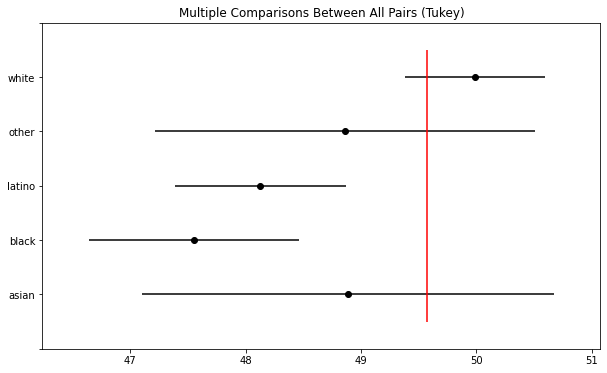

In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=voter_age,  # data
                         groups=voter_race, # groups
                         alpha=.05)         # significane level

tukey.plot_simultaneous() # Plot group confidence intervals
plt.vlines(x=49.57, ymin=-.5, ymax=4.5, color='red')

tukey.summary()           # See test summary

## Loading the data

As usual, we start by loading in a dataset of our sample observations. This particular table is of salaries in IT and has 4 columns:
* S - the individuals salary
* X - years of experience
* E - education level (1-Bachelors, 2-Masters, 3-PHD)
* M - management (0-no management, 1-yes management)

In [12]:
df = pd.read_csv('IT_salaries.csv')
df.head()

,S,X,E,M
0,13876,1,1,1
1,11608,1,3,0
2,18701,1,3,1
3,11283,1,2,0
4,11767,1,3,0


## Generating the ANOVA table

In order to generate the ANOVA table, you first fit a linear model and then generate the table from this object. Our formula will be written as:

```Control_Column ~ C(factor_col1) + factor_col2 + C(factor_col3) + ... + X```

_We indicate categorical variables by wrapping them with ```C() ```._ 

In [13]:
formula = 'S ~ C(E) + C(M) + X'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                sum_sq    df           F        PR(>F)
C(E)      9.152624e+07   2.0   43.351589  7.672450e-11
C(M)      5.075724e+08   1.0  480.825394  2.901444e-24
X         3.380979e+08   1.0  320.281524  5.546313e-21
Residual  4.328072e+07  41.0         NaN           NaN


## Interpreting the table

For now, simply focus on the outermost columns. On the left, you can see our various groups, and on the right, the probability that the factor is indeed influential. Values less than 0.05 (or whatever we set $\alpha$ to) indicate rejection of the null hypothesis. In this case, notice that all three factors appear influential, with management being the potentially most significant, followed by years experience, and finally, educational degree.

## Summary

In this lesson, you examined the ANOVA technique to generalize testing methods to multiple groups and factors.